# TOY FITTER tutorial

## 1) The General Idea:

We want to produce the "alternate hypothesis" test statistic distributions: **f(q_mu | H_mu)**, where: 
- mu is the parameter of interest
- q_mu is the test statistic coputed for a value mu_test
So that reads: the distro of the test statistic for mu_test = mu_true given that the a true hipothesis of mu = mu_true (so given data distributed with mu = mu_true).

We compute  f(q_mu | H_mu) for many mu_test = mu_true values and extract their 90% quantile.

We compute a TGraph of those quantile that we can evaluate at each point.

To get the sensitivity we compute the limit of a set of toys for the hypothesis H_0 (no signal). This means we find for each of them the value of mu_test that gives **q_mu-test_H0 = 90_quantile( f(q_mu-test | H_mu-test) )**


## 2) The Setup:
First of all I suggest you to produce a single compilable macro that contains the likelihood you want to use, you can find in other tutorial how to define the likelihood [here](https://xenon1t.github.io/Xephyr/docs/tutorials.html). The idea of this macro is to define a function that you can use to retrieve the likelihood, so that you have it defined in one place only. You can get inspiration on how to write this function from [here](https://github.com/XENON1T/SR1Results/blob/master/StatisticalAnalyses/xephyr_sr1_likelihood/src/likelihoodDef.cxx)

In [1]:
.x loadXephyr.C

(int) 0


In [2]:
// add path to include files to ROOT (in the file I'm going to load there are some Xephyr includes) 
gInterpreter->AddIncludePath("../src");  // in this case is just XEPHYR src from next dir.

###### now load the function to retrieve the likelihood

In [3]:
.L ../../SR1/StatisticalAnalyses/xephyr_sr1_likelihood/src/likelihoodDef.cxx

In [4]:
pdfLikelihood likeHood = getTheLikelihood(50.);  // 50. GeV mass

pdfLikelihood - INFO: bkg component named hband added to    SAFEGUARDED
pdfLikelihood::initialize - INFO :  initialize..... 
	Likelihood::addParameter - Info : Adding parameter Sigma  with ID -1  to PL xe1T
INFO :  adding sys for BKG component hband
	Likelihood::addParameter - Info : Adding parameter ERscale  with ID 1  to PL xe1T
	Likelihood::addParameter - Info : Adding parameter _PY  with ID 2  to PL xe1T
	Likelihood::addParameter - Info : Adding parameter _RF  with ID 3  to PL xe1T
INFO :  adding sys for SIGNAL component wimp_0050gev
	Likelihood::addParameter - Info : Adding parameter _gamma_  with ID 4  to PL xe1T
	Likelihood::addParameter - Info : Adding parameter _alpha_  with ID 5  to PL xe1T
	Likelihood::addParameter - Info : Adding parameter _eta_  with ID 6  to PL xe1T
	Likelihood::addParameter - Info : Adding parameter _acceptance_par_  with ID 7  to PL xe1T

------ WARNING -------  Safeguard is turned OFF altough you have set components to be safeguarded this is ignored --

In [5]:
ToyFitterExclusion fitter("treeName.root");

In [6]:
fitter.setTheLikelihood(&likeHood);

In [7]:
double qstat = fitter.computeTS(0.1);  // computing the test statistic with preset value of data in the likelihood

Finding maximum of xe1T
Total of 3 active parameters, don't freeze parameters of interest, Minuit fits 3 param.
 Id Name                 Type         Current Value               Uncertainty
 -1 Sigma                Of interest        0                 
  1 ERscale              Fixed              0                 
  2 _PY                  Nuisance           0                 
  3 _RF                  Nuisance           0                 
  4 _gamma_              Fixed              0                 
  5 _alpha_              Fixed              0                 
  6 _eta_                Fixed              0                 
  7 _acceptance_par_     Fixed              0                 
ML -231.566 achieved for 
 Id Name                 Type         Current Value               Uncertainty
 -1 Sigma                Of interest     0.24 +- 2.5      
  1 ERscale              Fixed              0                 
  2 _PY                  Nuisance        0.12 +- 1.3      
  3 _RF              

In [8]:
fitter.setPrintLevel(DEBUG);   //  suppressing output to only ERRORs

## 3) Fitting
### Fitting the Toy Generated Ntuple Tree list

In [9]:
// some settings
fitter.setPathToFile("treeName.root");   // just to show how to change path to file (not needed), here we put same as constructor
fitter.setTreeName("treeName");         // toy tree name prefix to fit in file
fitter.setRandomizeMeasure(true);       // if randomize or not the nuissance parameter measure (default to true)

In [10]:
// void fit(double mu, int stopAt=-999)
fitter.fit(10);   

ToyExclusion::fit - INFO : Matched tree name, treeName0
ToyExclusion::measureParameters - INFO : Randomizing parameters:
ToyExclusion::----> - INFO : Skipping paramater: Sigma
ToyExclusion::----> - INFO : Skipping paramater: ERscale
ToyExclusion::----> - INFO : new T0-Value: _PY = 0.07
ToyExclusion::----> - INFO : new T0-Value: _RF = 1.11
ToyExclusion::----> - INFO : Skipping paramater: _gamma_
ToyExclusion::----> - INFO : Skipping paramater: _alpha_
ToyExclusion::----> - INFO : Skipping paramater: _eta_
ToyExclusion::----> - INFO : Skipping paramater: _acceptance_par_
ToyExclusion::computeTS - DEBUG : maximize Data_treeName0 --> dmData
Finding maximum of xe1T
Total of 3 active parameters, don't freeze parameters of interest, Minuit fits 3 param.
 Id Name                 Type         Current Value               Uncertainty
 -1 Sigma                Of interest        0                 
  1 ERscale              Fixed              0                 
  2 _PY                  Nuisance      

Info in <Minuit2>: Minuit2Minimizer::Minimize : Minimization did NOT converge, Edm is above max


ML -333.322 achieved for 
 Id Name                 Type         Current Value               Uncertainty
 -1 Sigma                Of interest      9.1 +- 4.9      
  1 ERscale              Fixed              0                 
  2 _PY                  Nuisance        -0.1 +- 0.93     
  3 _RF                  Nuisance       -0.74 +- 1.2      
  4 _gamma_              Fixed              0                 
  5 _alpha_              Fixed              0                 
  6 _eta_                Fixed              0                 
  7 _acceptance_par_     Fixed              0                 
 Id Name                 Type         Current Value               Uncertainty
 -1 Sigma                Of interest      9.1                 
  1 ERscale              Fixed              0                 
  2 _PY                  Nuisance        -0.1                 
  3 _RF                  Nuisance       -0.74                 
  4 _gamma_              Fixed              0                 
  5 _alpha_

Stat::pdfLikelihood::computeTheLogLikelihood - WARNING : NsFs + NbFb <= 0 
Stat::pdfLikelihood::computeTheLogLikelihood - WARNING : NsFs + NbFb <= 0 
Stat::pdfLikelihood::computeTheLogLikelihood - WARNING : NsFs + NbFb <= 0 
Stat::pdfLikelihood::computeTheLogLikelihood - WARNING : NsFs + NbFb <= 0 
Stat::pdfLikelihood::computeTheLogLikelihood - WARNING : NsFs + NbFb <= 0 
Stat::pdfLikelihood::computeTheLogLikelihood - WARNING : NsFs + NbFb <= 0 
Stat::pdfLikelihood::computeTheLogLikelihood - WARNING : NsFs + NbFb <= 0 
Stat::pdfLikelihood::computeTheLogLikelihood - WARNING : NsFs + NbFb <= 0 
Stat::pdfLikelihood::computeTheLogLikelihood - WARNING : NsFs + NbFb <= 0 
Stat::pdfLikelihood::computeTheLogLikelihood - WARNING : NsFs + NbFb <= 0 
Stat::pdfLikelihood::computeTheLogLikelihood - WARNING : NsFs + NbFb <= 0 
Stat::pdfLikelihood::computeTheLogLikelihood - WARNING : NsFs + NbFb <= 0 
Stat::pdfLikelihood::computeTheLogLikelihood - WARNING : NsFs + NbFb <= 0 
Stat::pdfLikelihood::comp

ML -339.548 achieved for 
 Id Name                 Type         Current Value               Uncertainty
 -1 Sigma                Of interest      6.9 +- 4.6      
  1 ERscale              Fixed              0                 
  2 _PY                  Nuisance           1 +- 0.0097   
  3 _RF                  Nuisance       -0.29 +- 1.2      
  4 _gamma_              Fixed              0                 
  5 _alpha_              Fixed              0                 
  6 _eta_                Fixed              0                 
  7 _acceptance_par_     Fixed              0                 
 Id Name                 Type         Current Value               Uncertainty
 -1 Sigma                Of interest      6.9                 
  1 ERscale              Fixed              0                 
  2 _PY                  Nuisance           1                 
  3 _RF                  Nuisance       -0.29                 
  4 _gamma_              Fixed              0                 
  5 _alpha_

ML -316.737 achieved for 
 Id Name                 Type         Current Value               Uncertainty
 -1 Sigma                Of interest       14 +- 6.5      
  1 ERscale              Fixed              0                 
  2 _PY                  Nuisance         1.9 +- 2.8      
  3 _RF                  Nuisance        -1.4 +- 1.2      
  4 _gamma_              Fixed              0                 
  5 _alpha_              Fixed              0                 
  6 _eta_                Fixed              0                 
  7 _acceptance_par_     Fixed              0                 
 Id Name                 Type         Current Value               Uncertainty
 -1 Sigma                Of interest       14                 
  1 ERscale              Fixed              0                 
  2 _PY                  Nuisance         1.9                 
  3 _RF                  Nuisance        -1.4                 
  4 _gamma_              Fixed              0                 
  5 _alpha_

ML -325.254 achieved for 
 Id Name                 Type         Current Value               Uncertainty
 -1 Sigma                Of interest      2.7 +- 3.4      
  1 ERscale              Fixed              0                 
  2 _PY                  Nuisance        0.85 +- 0.73     
  3 _RF                  Nuisance       -0.93 +- 1.2      
  4 _gamma_              Fixed              0                 
  5 _alpha_              Fixed              0                 
  6 _eta_                Fixed              0                 
  7 _acceptance_par_     Fixed              0                 
 Id Name                 Type         Current Value               Uncertainty
 -1 Sigma                Of interest      2.7                 
  1 ERscale              Fixed              0                 
  2 _PY                  Nuisance        0.85                 
  3 _RF                  Nuisance       -0.93                 
  4 _gamma_              Fixed              0                 
  5 _alpha_

Info in <Minuit2>: MnGlobalCorrelationCoeff: inversion of matrix fails.
Info in <Minuit2>: Minuit2Minimizer::Minimize : Minimization did NOT converge, Edm is above max


Stat::pdfLikelihood::computeTheLogLikelihood - WARNING : NsFs + NbFb <= 0 
Stat::pdfLikelihood::computeTheLogLikelihood - WARNING : NsFs + NbFb <= 0 
Stat::pdfLikelihood::computeTheLogLikelihood - WARNING : NsFs + NbFb <= 0 
Stat::pdfLikelihood::computeTheLogLikelihood - WARNING : NsFs + NbFb <= 0 
ML -343.597 achieved for 
 Id Name                 Type         Current Value               Uncertainty
 -1 Sigma                Of interest      7.3 +- 5.1      
  1 ERscale              Fixed              0                 
  2 _PY                  Nuisance         1.7 +- 0.0045   
  3 _RF                  Nuisance          -2 +- 2        
  4 _gamma_              Fixed              0                 
  5 _alpha_              Fixed              0                 
  6 _eta_                Fixed              0                 
  7 _acceptance_par_     Fixed              0                 
 Id Name                 Type         Current Value               Uncertainty
 -1 Sigma                O

### Having a look at output fit file
This contains a tree, the tree has an entry for each input Toy tree. Each entry contains the post fit values for NP, likelihood and test statistic. In the example below I just hadded a few of these trees for different mu_fit [2.5,3,3.5,4], so now we can have a look at some distros.

In [11]:
TFile *f = TFile::Open("post_fit_test.root");
TTree *postFitTree  = (TTree*) f->Get("out_test");

In [12]:
postFitTree->Print();

******************************************************************************
*Tree    :out_test  : output tree for a given mu, hadd me                    *
*Entries :     4000 : Total =         1544931 bytes  File  Size =     321732 *
*        :          : Tree compression factor =   4.81                       *
******************************************************************************
*Br    0 :mu_fit    : mu_fit/D                                               *
*Entries :     4000 : Total  Size=      32794 bytes  File Size  =        656 *
*Baskets :        4 : Basket Size=      32000 bytes  Compression=  49.25     *
*............................................................................*
*Br    1 :q_mu      : testStat/D                                             *
*Entries :     4000 : Total  Size=      32790 bytes  File Size  =      18474 *
*Baskets :        4 : Basket Size=      32000 bytes  Compression=   1.75     *
*...................................................

#### We can now plot for example the distro of mu_hat for a certain value of Toy generated mu (true mu)
mu_hat is the first parameter of the unconditional fit

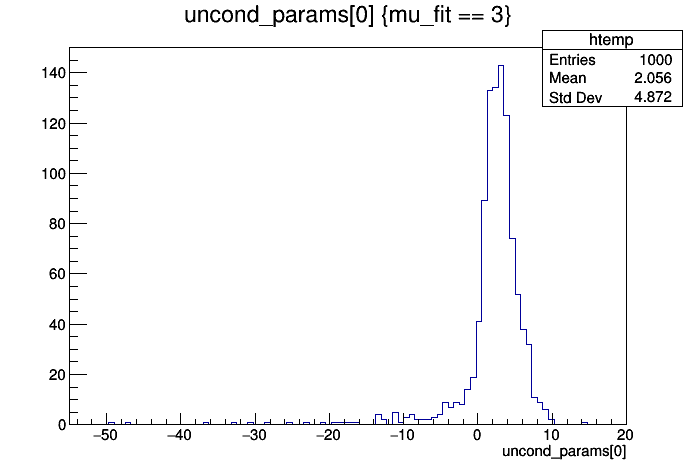

In [13]:
TCanvas *can = new TCanvas();
postFitTree->Draw("uncond_params[0]","mu_fit == 3");
can->Draw();

#### printout of all parameters

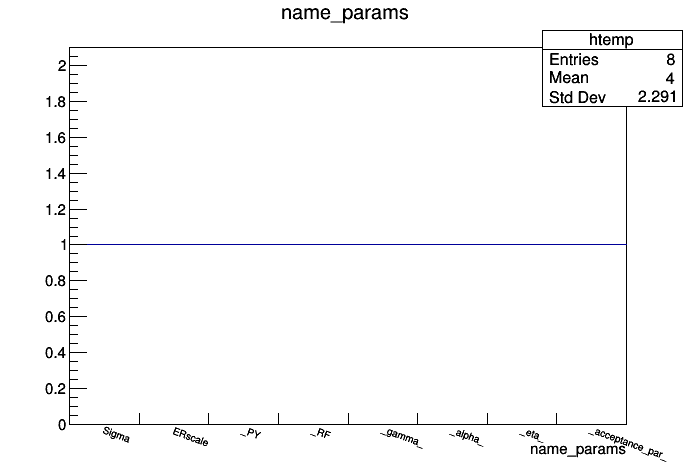

In [14]:
postFitTree->Draw("name_params","","",1);
can->Draw();

### example of unconditional pulls for RF

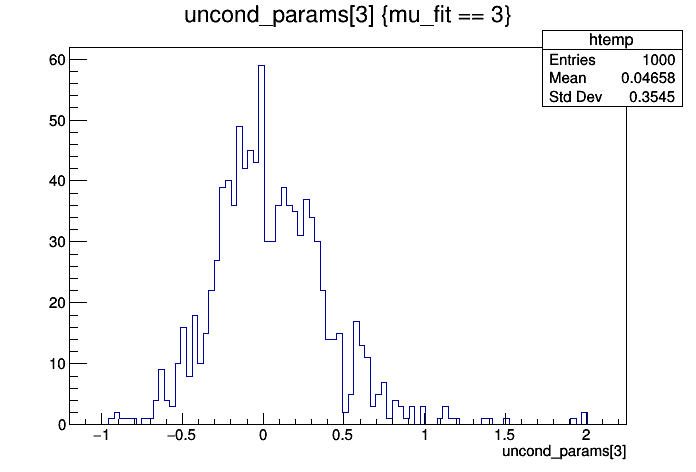

In [15]:
postFitTree->Draw("uncond_params[3]","mu_fit == 3");
can->Draw();

#### Or test statistic distributions

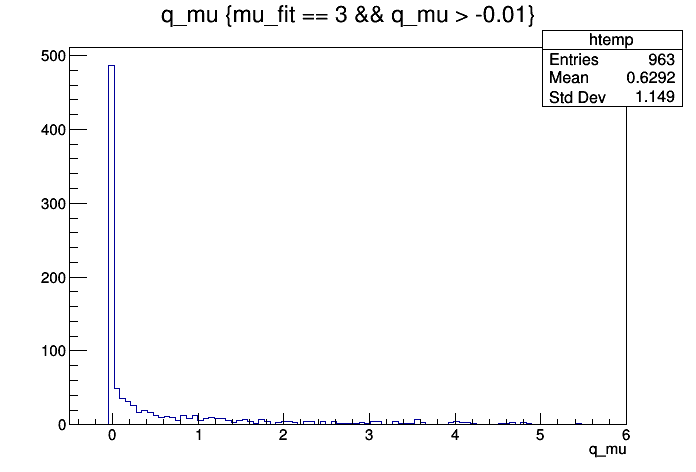

In [16]:
postFitTree->Draw("q_mu","mu_fit == 3 && q_mu > -0.01");  // at the time of writing there is probably a bug here
can->Draw();

## 4) Generating the 90% quantiles curve needed for limits

In [17]:
double mu_lista[4]   =  { 2.5, 3., 3.5, 4. };    // list of true mu hypothesis that we fitted (tested)
TGraphAsymmErrors quantiles ( fitter.computeTSDistros(postFitTree, mu_lista, 4 ) );

Quantiles: 
  mu	  50%	  88%	  90%	  92%
2.500 	 0.015 	 2.390 	 2.695 	 3.075
3.000 	 0.015 	 1.918 	 2.306 	 2.821
3.500 	 0.010 	 1.894 	 2.198 	 2.696
4.000 	 0.010 	 1.932 	 2.275 	 2.658


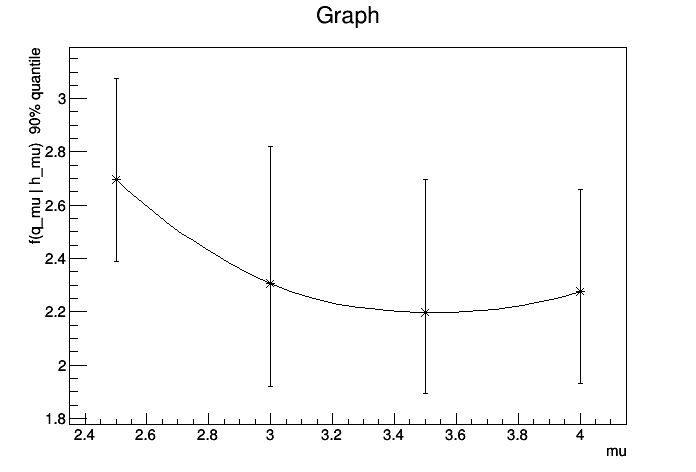

In [18]:
quantiles.GetXaxis()->SetTitle("mu");
quantiles.GetYaxis()->SetTitle("f(q_mu | h_mu)  90% quantile");
quantiles.Draw("AC*");
can->Draw();

### What do we do with it?
given a toy dataset generated under null hypothesis,  we compute q_mu for it, let's say for mu_test = 2.8, then mu = 2.8 is excluded @ >= 90% CL (given that dataset only) if the obtained q_mu >= 2.4

## 5) Limits and sensitivity bands

 to the next episode ;)

In [ ]:
// some settings
fitter.setPathToFile("null_hypomutrue0.00.root");   // just to show how to change path to file (not needed), here we put same as constructor
fitter.setTreeName("null_hypo");         // toy tree name prefix to fit in file
fitter.setRandomizeMeasure(true);       // if randomize or not the nuissance parameter measure (default to true)

In [ ]:
// spitTheLimit(TGraphAsymmErrors *ninety_quantiles, int stopAt )
fitter.spitTheLimit(&quantiles);

ToyExclusion::fit - INFO : Matched tree name, null_hypo0
ToyExclusion::measureParameters - INFO : Randomizing parameters:
ToyExclusion::----> - INFO : Skipping paramater: Sigma
ToyExclusion::----> - INFO : Skipping paramater: ERscale
ToyExclusion::----> - INFO : new T0-Value: _PY = -0.70
ToyExclusion::----> - INFO : new T0-Value: _RF = 0.26
ToyExclusion::----> - INFO : Skipping paramater: _gamma_
ToyExclusion::----> - INFO : Skipping paramater: _alpha_
ToyExclusion::----> - INFO : Skipping paramater: _eta_
ToyExclusion::----> - INFO : Skipping paramater: _acceptance_par_
ToyExclusion::computeTS - DEBUG : maximize Data_null_hypo0 --> Data_treeName9
Finding maximum of xe1T
Total of 3 active parameters, don't freeze parameters of interest, Minuit fits 3 param.
 Id Name                 Type         Current Value               Uncertainty
 -1 Sigma                Of interest        0                 
  1 ERscale              Fixed              0                 
  2 _PY                  Nui

Info in <Minuit2>: Minuit2Minimizer::Minimize : Minimization did NOT converge, Edm is above max


ML -186.103 achieved for 
 Id Name                 Type         Current Value               Uncertainty
 -1 Sigma                Frozen             1                 
  1 ERscale              Fixed              0                 
  2 _PY                  Nuisance          -1 +- 0.00089  
  3 _RF                  Nuisance       -0.17 +- 1.2      
  4 _gamma_              Fixed              0                 
  5 _alpha_              Fixed              0                 
  6 _eta_                Fixed              0                 
  7 _acceptance_par_     Fixed              0                 
 Id Name                 Type         Current Value               Uncertainty
 -1 Sigma                Frozen             1                 
  1 ERscale              Fixed              0                 
  2 _PY                  Nuisance          -1                 
  3 _RF                  Nuisance       -0.17                 
  4 _gamma_              Fixed              0                 
  5 _al

ML -187.097 achieved for 
 Id Name                 Type         Current Value               Uncertainty
 -1 Sigma                Frozen           3.4                 
  1 ERscale              Fixed              0                 
  2 _PY                  Nuisance          -1 +- 0.0018   
  3 _RF                  Nuisance       -0.19 +- 1.3      
  4 _gamma_              Fixed              0                 
  5 _alpha_              Fixed              0                 
  6 _eta_                Fixed              0                 
  7 _acceptance_par_     Fixed              0                 
 Id Name                 Type         Current Value               Uncertainty
 -1 Sigma                Frozen           3.4                 
  1 ERscale              Fixed              0                 
  2 _PY                  Nuisance          -1                 
  3 _RF                  Nuisance       -0.19                 
  4 _gamma_              Fixed              0                 
  5 _al

ML -187.465 achieved for 
 Id Name                 Type         Current Value               Uncertainty
 -1 Sigma                Frozen           3.6                 
  1 ERscale              Fixed              0                 
  2 _PY                  Nuisance        -0.5 +- 0.0075   
  3 _RF                  Nuisance       -0.19 +- 1.3      
  4 _gamma_              Fixed              0                 
  5 _alpha_              Fixed              0                 
  6 _eta_                Fixed              0                 
  7 _acceptance_par_     Fixed              0                 
 Id Name                 Type         Current Value               Uncertainty
 -1 Sigma                Frozen           3.6                 
  1 ERscale              Fixed              0                 
  2 _PY                  Nuisance        -0.5                 
  3 _RF                  Nuisance       -0.19                 
  4 _gamma_              Fixed              0                 
  5 _al

ML -238.068 achieved for 
 Id Name                 Type         Current Value               Uncertainty
 -1 Sigma                Frozen             0                 
  1 ERscale              Fixed              0                 
  2 _PY                  Nuisance          -1 +- 0.0037   
  3 _RF                  Nuisance        -1.6 +- 2        
  4 _gamma_              Fixed              0                 
  5 _alpha_              Fixed              0                 
  6 _eta_                Fixed              0                 
  7 _acceptance_par_     Fixed              0                 
Finding maximum of xe1T
Total of 3 active parameters,  freeze parameters of interest, Minuit fits 2 param.
 Id Name                 Type         Current Value               Uncertainty
 -1 Sigma                Frozen             1                 
  1 ERscale              Fixed              0                 
  2 _PY                  Nuisance          -1                 
  3 _RF                  N

ML -241.466 achieved for 
 Id Name                 Type         Current Value               Uncertainty
 -1 Sigma                Frozen             4                 
  1 ERscale              Fixed              0                 
  2 _PY                  Nuisance        -0.5 +- 0.0093   
  3 _RF                  Nuisance        -1.7 +- 2.1      
  4 _gamma_              Fixed              0                 
  5 _alpha_              Fixed              0                 
  6 _eta_                Fixed              0                 
  7 _acceptance_par_     Fixed              0                 
 Id Name                 Type         Current Value               Uncertainty
 -1 Sigma                Frozen             4                 
  1 ERscale              Fixed              0                 
  2 _PY                  Nuisance        -0.5                 
  3 _RF                  Nuisance        -1.7                 
  4 _gamma_              Fixed              0                 
  5 _al

ML -238.068 achieved for 
 Id Name                 Type         Current Value               Uncertainty
 -1 Sigma                Frozen             0                 
  1 ERscale              Fixed              0                 
  2 _PY                  Nuisance          -1 +- 0.0037   
  3 _RF                  Nuisance        -1.6 +- 2        
  4 _gamma_              Fixed              0                 
  5 _alpha_              Fixed              0                 
  6 _eta_                Fixed              0                 
  7 _acceptance_par_     Fixed              0                 
Finding maximum of xe1T
Total of 3 active parameters,  freeze parameters of interest, Minuit fits 2 param.
 Id Name                 Type         Current Value               Uncertainty
 -1 Sigma                Frozen           1.6                 
  1 ERscale              Fixed              0                 
  2 _PY                  Nuisance          -1                 
  3 _RF                  N

ML -239.874 achieved for 
 Id Name                 Type         Current Value               Uncertainty
 -1 Sigma                Frozen           2.1                 
  1 ERscale              Fixed              0                 
  2 _PY                  Nuisance        -0.5 +- 0.019    
  3 _RF                  Nuisance        -1.7 +- 2.1      
  4 _gamma_              Fixed              0                 
  5 _alpha_              Fixed              0                 
  6 _eta_                Fixed              0                 
  7 _acceptance_par_     Fixed              0                 
 Id Name                 Type         Current Value               Uncertainty
 -1 Sigma                Frozen           2.1                 
  1 ERscale              Fixed              0                 
  2 _PY                  Nuisance        -0.5                 
  3 _RF                  Nuisance        -1.7                 
  4 _gamma_              Fixed              0                 
  5 _al

ML -238.068 achieved for 
 Id Name                 Type         Current Value               Uncertainty
 -1 Sigma                Frozen             0                 
  1 ERscale              Fixed              0                 
  2 _PY                  Nuisance          -1 +- 0.0037   
  3 _RF                  Nuisance        -1.6 +- 2        
  4 _gamma_              Fixed              0                 
  5 _alpha_              Fixed              0                 
  6 _eta_                Fixed              0                 
  7 _acceptance_par_     Fixed              0                 
Finding maximum of xe1T
Total of 3 active parameters,  freeze parameters of interest, Minuit fits 2 param.
 Id Name                 Type         Current Value               Uncertainty
 -1 Sigma                Frozen           1.9                 
  1 ERscale              Fixed              0                 
  2 _PY                  Nuisance          -1                 
  3 _RF                  N

ML -250.799 achieved for 
 Id Name                 Type         Current Value               Uncertainty
 -1 Sigma                Frozen           2.5                 
  1 ERscale              Fixed              0                 
  2 _PY                  Nuisance        0.16 +- 1.1      
  3 _RF                  Nuisance        0.38 +- 1.2      
  4 _gamma_              Fixed              0                 
  5 _alpha_              Fixed              0                 
  6 _eta_                Fixed              0                 
  7 _acceptance_par_     Fixed              0                 
 Id Name                 Type         Current Value               Uncertainty
 -1 Sigma                Frozen           2.5                 
  1 ERscale              Fixed              0                 
  2 _PY                  Nuisance        0.16                 
  3 _RF                  Nuisance        0.38                 
  4 _gamma_              Fixed              0                 
  5 _al